In [43]:
import matplotlib.pyplot as plt

SMALL_SIZE = 15
MEDIUM_SIZE = 20
BIGGER_SIZE = 24

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rcParams['image.cmap'] = 'viridis'

In [14]:
import builtins
import csv
import numpy as np

def plot_latencies(filename):
    read_latencies = []
    write_latencies = []
    with builtins.open(filename, 'r') as f:
        csvreader = csv.DictReader(f, delimiter=',')
        for row in csvreader:
            if row['type'] == 'READ':
                read_latencies.append(float(row['time']))
            elif row['type'] == 'UPLOAD':
                write_latencies.append(float(row['time']))
    
    print(f"{len(read_latencies)} read requests, mean latency {np.mean(read_latencies)} (std. dev. {np.std(read_latencies)})")
    print(f"{len(write_latencies)} upload requests, mean latency {np.mean(write_latencies)} (std. dev. {np.std(write_latencies)})")
    
    plt.plot(read_latencies, label='Read Latencies')
    plt.plot(write_latencies, label='Write Latencies')

In [31]:
import builtins
import csv
import numpy as np

def plot_latency_comparison(baseline_file, skydentity_file, operation):
    if operation not in ['READ', 'UPLOAD']:
        raise ValueError("operation must be either 'READ' or 'UPLOAD'")
    baseline_latencies = []
    with builtins.open(baseline_file, 'r') as f:
        csvreader = csv.DictReader(f, delimiter=',')
        for row in csvreader:
            if row['type'] == operation:
                baseline_latencies.append(float(row['time']))
    
    skydentity_latencies = []
    with builtins.open(skydentity_file, 'r') as f:
        csvreader = csv.DictReader(f, delimiter=',')
        for row in csvreader:
            if row['type'] == operation:
                skydentity_latencies.append(float(row['time']))
    
    print(f"Baseline: {len(baseline_latencies)} {operation} requests, mean latency {np.mean(baseline_latencies)} (std. dev. {np.std(baseline_latencies)})")
    print(f"Skydentity: {len(skydentity_latencies)} {operation} requests, mean latency {np.mean(skydentity_latencies)} (std. dev. {np.std(skydentity_latencies)})")
    
    plt.plot(baseline_latencies, label='Baseline')
    plt.plot(skydentity_latencies, label='CloudGate')
    plt.ylim(0, 22)
    plt.ylabel('Latency (s)')
    plt.xlabel('Request #')
    plt.legend()
    plt.title(f'{operation} Latencies')

48 read requests, mean latency 1.9800971776467122 (std. dev. 0.10579213636032354)
48 upload requests, mean latency 3.0668539643532617 (std. dev. 0.15010042403169452)


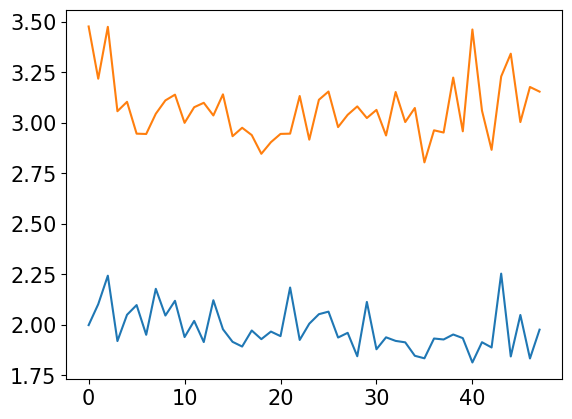

In [15]:
plot_latencies("logs/baseline/interleave-buckets-16-direct-data-2.csv")

48 read requests, mean latency 2.884137575688328 (std. dev. 3.4036214616727283)
48 upload requests, mean latency 4.096158030937052 (std. dev. 3.741526661155335)


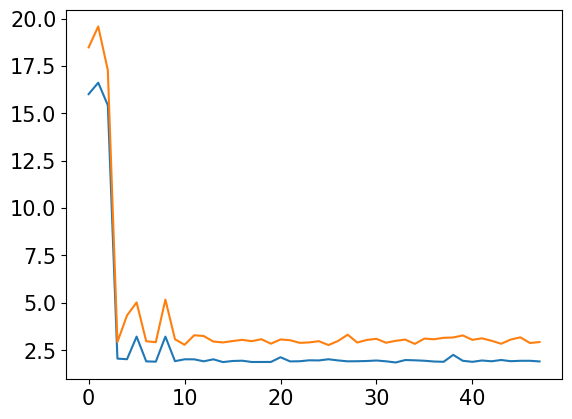

In [17]:
plot_latencies("logs/skydentity/interleave-buckets-16-skydentity-data-2.csv")

Baseline: 48 READ requests, mean latency 1.9800971776467122 (std. dev. 0.10579213636032354)
Skydentity: 48 READ requests, mean latency 2.884137575688328 (std. dev. 3.4036214616727283)


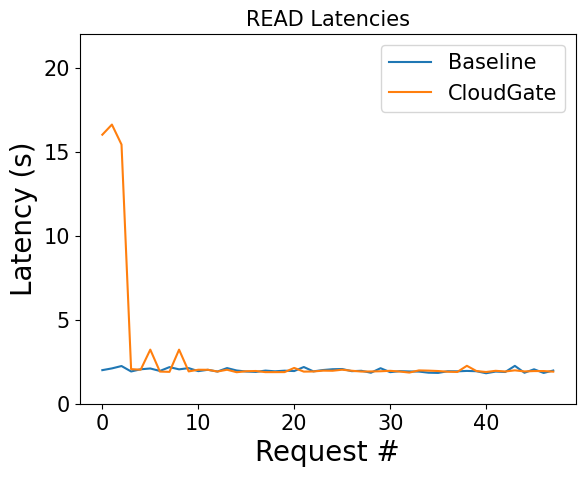

In [32]:
plot_latency_comparison("logs/baseline/interleave-buckets-16-direct-data-2.csv", "logs/skydentity/interleave-buckets-16-skydentity-data-2.csv", 'READ')

Baseline: 48 UPLOAD requests, mean latency 3.0668539643532617 (std. dev. 0.15010042403169452)
Skydentity: 48 UPLOAD requests, mean latency 4.096158030937052 (std. dev. 3.741526661155335)


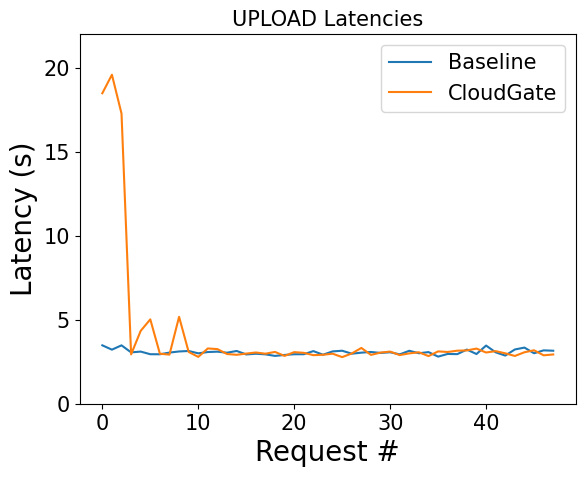

In [33]:
plot_latency_comparison("logs/baseline/interleave-buckets-16-direct-data-2.csv", "logs/skydentity/interleave-buckets-16-skydentity-data-2.csv", 'UPLOAD')

Baseline: 64 READ requests, mean latency 1.9899619102961879 (std. dev. 0.10790943564392674)
Skydentity: 64 READ requests, mean latency 2.2634467355937886 (std. dev. 1.7649460038255287)


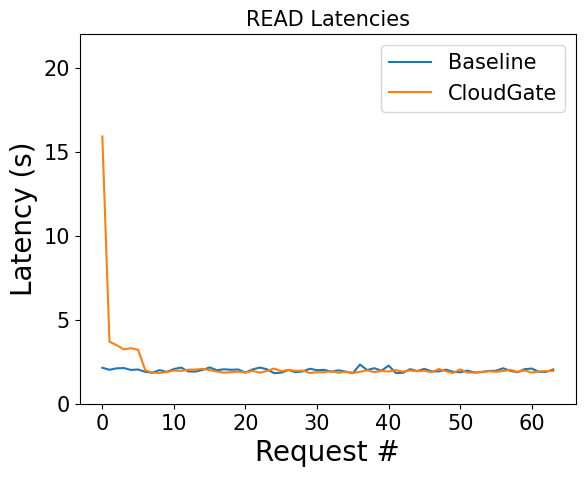

In [34]:
plot_latency_comparison("logs/baseline/interleave-read-write-64-direct-data-2.csv", "logs/skydentity/interleave-read-write-64-skydentity-data-2.csv", 'READ')

Baseline: 64 UPLOAD requests, mean latency 3.3331972145465443 (std. dev. 0.22068016133046164)
Skydentity: 64 UPLOAD requests, mean latency 3.885693501046944 (std. dev. 2.0816955780711726)


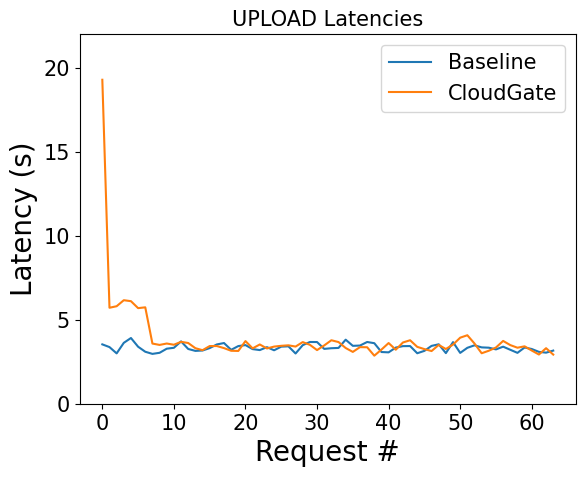

In [35]:
plot_latency_comparison("logs/baseline/interleave-read-write-64-direct-data-2.csv", "logs/skydentity/interleave-read-write-64-skydentity-data-2.csv", 'UPLOAD')

In [49]:
import builtins
import csv
import numpy as np

def plot_latency_comparison_concurrent(baseline_file, skydentity_file):
    baseline_throughputs = []
    baseline_latencies = []
    with builtins.open(baseline_file, 'r') as f:
        csvreader = csv.DictReader(f, delimiter=',')
        for row in csvreader:
            baseline_latencies.append(float(row['time']))
    
    skydentity_latencies = []
    with builtins.open(skydentity_file, 'r') as f:
        csvreader = csv.DictReader(f, delimiter=',')
        for row in csvreader:
            skydentity_latencies.append(float(row['time']))
    
    print(f"Baseline: {len(baseline_latencies)} requests, mean latency {np.mean(baseline_latencies)} (std. dev. {np.std(baseline_latencies)})")
    print(f"Skydentity: {len(skydentity_latencies)} requests, mean latency {np.mean(skydentity_latencies)} (std. dev. {np.std(skydentity_latencies)})")
    
    plt.plot(baseline_latencies, label='Baseline')
    plt.plot(skydentity_latencies, label='CloudGate')
    #plt.ylim(0, 22)
    plt.ylabel('Latency (s)')
    plt.xlabel('Request #')
    plt.legend()
    #plt.title(f'{operation} Latencies')

Baseline: 96 requests, mean latency 8.907612977228988 (std. dev. 2.7209627196081954)
Skydentity: 96 requests, mean latency 23.855771741854067 (std. dev. 27.45994753645498)


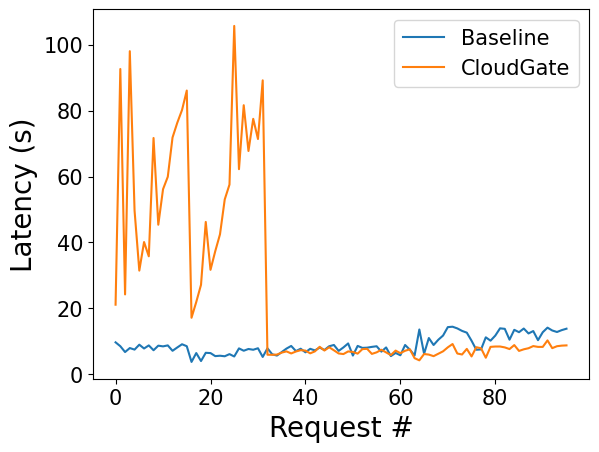

In [50]:
plot_latency_comparison_concurrent("logs/baseline/concurrent-buckets-16-direct-data-2.csv", "logs/skydentity/concurrent-buckets-16-skydentity-data-2.csv")

In [63]:
from collections import defaultdict
from datetime import datetime

def get_throughput(filename):
    with builtins.open(filename, 'r') as f:
        lines = f.readlines()
        tputs = defaultdict(list)
        idx = 0
        while idx < len(lines):
            line = lines[idx]
            reqs = 0
            type = ""
            if "===== SENDING " in line:
                type = line.split(" ")[7]
                print(type)
            else:
                idx += 1
                continue
            start_string = lines[idx + 1].split(" ")[1].strip()
            start = datetime.strptime(start_string, '%H:%M:%S,%f')
            if "seconds" in lines[idx + 16]:
                end_string = lines[idx + 16].split(" ")[1].strip() 
                reqs = 16
                idx += 16
            else:
                end_string = lines[idx + 32].split(" ")[1].strip()
                reqs = 32
                idx += 32
            end = datetime.strptime(end_string, '%H:%M:%S,%f')
            tputs[type].append(float(reqs) / (end-start).total_seconds())
    return tputs

In [64]:
get_throughput("logs/baseline/concurrent-buckets-16-direct-results-2.log")
get_throughput("logs/skydentity/concurrent-buckets-16-skydentity-results-2.log")

WRITES
READS
WRITES
READS
READ/WRITES
WRITES
READS
WRITES
READS
READ/WRITES


defaultdict(list,
            {'WRITES': [0.32637741468290393, 3.7343914108997547],
             'READS': [0.30249749494262, 4.08111210304808],
             'READ/WRITES': [53.24459234608985]})

In [68]:
def plot_tputs(baseline_fname, skydentity_fname):
    baseline_tput_dict = get_throughput(baseline_fname)
    skydentity_tput_dict = get_throughput(skydentity_fname)
    
    print(baseline_tput_dict)

    baseline_tputs = []
    skydentity_tputs = []
    events = []
    for event, tput in baseline_tput_dict.items():
        for tp in tput:
            baseline_tputs.append(tp)
            events.append(event)
    for event in events:
        for tp in skydentity_tput_dict[event]:
            skydentity_tputs.append(tp)

    x = np.arange(len(events))
    width = 0.35

    fig, ax = plt.subplots(figsize=(10, 2))
    ax.bar(x - width/2, baseline_tputs, width, label='Baseline')
    ax.bar(x + width/2, skydentity_tputs, width, label='w/ CloudGate')
    ax.set_ylabel('Req/s')
    ax.set_title(f"Throughput")
    ax.set_xticks(x)
    ax.set_xticklabels(events)
    ax.legend(loc="lower right")
    plt.show()

WRITES
READS
WRITES
READS
READ/WRITES
WRITES
READS
WRITES
READS
READ/WRITES
defaultdict(<class 'list'>, {'WRITES': [3.2925198065644614, 3.518416712479384], 'READS': [3.961376578360981, 3.4046175125013303], 'READ/WRITES': [77.85888077858881]})


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (3,) and arg 1 with shape (5,).

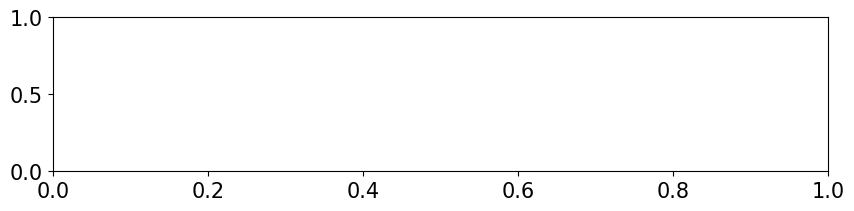

In [69]:
plot_tputs("logs/baseline/concurrent-buckets-16-direct-results-2.log", "logs/skydentity/concurrent-buckets-16-skydentity-results-2.log")